In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential, Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, concatenate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf


#EDA

In [ ]:
df_iot = pd.read_csv('TON_IoT.csv?dl=0')

In [ ]:
unique_values = df_iot['type'].unique()
print(unique_values)

['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']


In [ ]:
df_iot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      461043 non-null  int64  
 1   src_ip                  461043 non-null  object 
 2   src_port                461043 non-null  int64  
 3   dst_ip                  461043 non-null  object 
 4   dst_port                461043 non-null  int64  
 5   proto                   461043 non-null  object 
 6   service                 461043 non-null  object 
 7   duration                461043 non-null  float64
 8   src_bytes               461043 non-null  int64  
 9   dst_bytes               461043 non-null  int64  
 10  conn_state              461043 non-null  object 
 11  missed_bytes            461043 non-null  int64  
 12  src_pkts                461043 non-null  int64  
 13  src_ip_bytes            461043 non-null  int64  
 14  dst_pkts            

# security

## encrypt Data

In [ ]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from base64 import b64encode

# Generate a random AES key
aes_key = get_random_bytes(32)  # AES-256

# For demonstration purposes, we'll encode the key in base64 so that it's readable
base64_encoded_aes_key = b64encode(aes_key).decode('utf-8')

base64_encoded_aes_key

'y+tKwe6rfT1aK1dCenFGvFUPmlfrZ9D+y9x4gkSUyPs='

In [ ]:
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

# Path for the encrypted and decrypted files
encrypted_file_path = "encrypted_TON_IoT.csv"
# decrypted_file_path = "/mnt/data/decrypted_TON_IoT.csv"

def encrypt_file(input_file_path, output_file_path, key):
    # Initialize AES cipher with CBC mode
    iv = get_random_bytes(16)
    cipher = AES.new(key, AES.MODE_CBC, iv)

    # Read and encrypt the file
    with open(input_file_path, 'rb') as file:
        plaintext = file.read()
        ciphertext = cipher.encrypt(pad(plaintext, AES.block_size))

    # Write the IV followed by the ciphertext to the output file
    with open(output_file_path, 'wb') as file:
        file.write(iv + ciphertext)

# Encrypt the provided CSV file
encrypt_file("/content/TON_IoT.csv?dl=0", encrypted_file_path, aes_key)

encrypted_file_path


'encrypted_TON_IoT.csv'

## encrypt key

In [ ]:
from Crypto.PublicKey import RSA

# Generate RSA key pair
rsa_key = RSA.generate(2048)
private_key = rsa_key.export_key()
public_key = rsa_key.publickey().export_key()

# For demonstration purposes, we'll save the keys to files
private_key_path = "private_key.pem"
public_key_path = "public_key.pem"

with open(private_key_path, 'wb') as file:
    file.write(private_key)

with open(public_key_path, 'wb') as file:
    file.write(public_key)

private_key_path, public_key_path


('private_key.pem', 'public_key.pem')

In [ ]:
from Crypto.Cipher import PKCS1_OAEP

# Load the public key
rsa_public_key = RSA.import_key(open(public_key_path).read())

# Initialize RSA cipher with PKCS1 OAEP padding
cipher_rsa = PKCS1_OAEP.new(rsa_public_key)

# Encrypt the AES key
encrypted_aes_key = cipher_rsa.encrypt(aes_key)

# Encode the encrypted AES key in base64 for readability
base64_encoded_encrypted_aes_key = b64encode(encrypted_aes_key).decode('utf-8')

base64_encoded_encrypted_aes_key


'GyJWRGd/FJG9PVJbJAEtpgbOtKN5OmAlGhdkCe1h3OSjYJmij4/7B7RPTeypmOh5hfYCe4WWvdtiBV4jVkgyx8duiDR6/iQ3Y4SJgjCKQEqZUzJKNOKIBYccqJ3KEOO1atuedaS/wVAeL6YGqLVn0SmfIS2Sverb7FqcfL76YzBxNvNSgfDfUXwVrouWuPa1Jpv1sEXsCaN0DfJyun7I8nqlHhgbHLEfXlHhvRAGR52L5ZxoKiCTRndhBZDg263PbFtsKOvvrAoQfAQeZrUi2fGMw0+OiTpDTrHzQmzh5t8eYOYV5UGzrfq+O1vl8QeUhgl7apIqLCS4BlOKXw8CKA=='

## decrypt key

In [ ]:
# Load the private key
rsa_private_key = RSA.import_key(open(private_key_path).read())

# Initialize RSA cipher with PKCS1 OAEP padding for decryption
cipher_rsa_dec = PKCS1_OAEP.new(rsa_private_key)

# Decrypt the encrypted AES key
decrypted_aes_key = cipher_rsa_dec.decrypt(encrypted_aes_key)

# Encode the decrypted AES key in base64 for readability
base64_encoded_decrypted_aes_key = b64encode(decrypted_aes_key).decode('utf-8')

base64_encoded_decrypted_aes_key


'y+tKwe6rfT1aK1dCenFGvFUPmlfrZ9D+y9x4gkSUyPs='

## decrypt data

In [ ]:
from base64 import b64decode

decrypted_aes_key

decrypted_file_path = '/content/decrypted_TON_IoT.csv'

def decrypt_file(input_file_path, output_file_path, key):
    # Read the IV and ciphertext from the encrypted file
    with open(input_file_path, 'rb') as file:
        iv = file.read(16)
        ciphertext = file.read()

    # Initialize AES cipher with CBC mode
    cipher = AES.new(key, AES.MODE_CBC, iv)

    # Decrypt the ciphertext and unpad it
    plaintext = unpad(cipher.decrypt(ciphertext), AES.block_size)

    # Write the decrypted data to the output file
    with open(output_file_path, 'wb') as file:
        file.write(plaintext)

# Decrypt the encrypted file using the decoded AES key
decrypt_file(encrypted_file_path, decrypted_file_path, decoded_aes_key)

decrypted_file_path


'/content/decrypted_TON_IoT.csv'

## security validation

In [ ]:
# Check if the decrypted AES key matches the original AES key
key_match = decrypted_aes_key == aes_key
print('the decrypted AES key matches the original key') if key_match else 'the decrypted AES key does not matche the original key'

the decrypted AES key matches the original key


In [ ]:
import pandas as pd

# Load the original and decrypted CSV files
original_df = pd.read_csv("/content/TON_IoT.csv?dl=0")
decrypted_df = pd.read_csv(decrypted_file_path)

# Get the shapes of both dataframes
original_shape = original_df.shape
decrypted_shape = decrypted_df.shape

'shapes:', original_shape, decrypted_shape



('shapes:', (461043, 45), (461043, 45))

In [ ]:
# Compare rows of both dataframes
matching_rows = (original_df == decrypted_df).all(axis=1).sum()

# Calculate the percentage of matching rows
percentage_matching = (matching_rows / len(original_df)) * 100

print('matching rows:')
print(matching_rows , '/', len(original_df))
print(percentage_matching, '% match')


matching rows:
461043 / 461043
100.0 % match


# processing

In [ ]:
X= decrypted_df.drop(['label', 'type'], axis = 1)
y= decrypted_df['label']

In [ ]:
le = LabelEncoder()
for col in X.columns:
    # Check if the column is of type object
    if X[col].dtype == 'object':
        # Create a LabelEncoder instance and fit-transform the column
        X[col] = le.fit_transform(X[col].astype(str))

In [ ]:
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)

In [ ]:
num_nans = X.isna().sum().sum()
print(f'Total NaN values in df: {num_nans}')

Total NaN values in df: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=20)

In [ ]:
def evaluate_classifier(y_test, y_pred):

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(set(y_test)))
    plt.xticks(tick_marks, sorted(set(y_test)))
    plt.yticks(tick_marks, sorted(set(y_test)))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add the numbers to the confusion matrix plot
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2. else 'black')

    plt.show()

    # Calculate the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    # Calculate sensitivity and specificity
    sensitivity = []
    specificity = []
    for i in range(cm.shape[0]):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - tp - fp - fn
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)


# **TON-IOT**

# Hyper parameter tuning

## Snake optimization algorithm

In [ ]:
import numpy as np
from keras.layers import LSTM, Bidirectional, Dropout, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define the Search Space
lstm_units = [32, 64, 128]
dropout_rates = [0.1, 0.2, 0.3]
learning_rates = [0.001, 0.005]
batch_sizes = [32, 64]

# Initial Random Selection from Search Space
current_hyperparameters = {
    "lstm_unit": np.random.choice(lstm_units),
    "dropout_rate": np.random.choice(dropout_rates),
    "learning_rate": np.random.choice(learning_rates),
    "batch_size": np.random.choice(batch_sizes)
}

# Store the best hyperparameters and accuracy
best_hyperparameters = None
best_accuracy = 0

# Function to train a model with given hyperparameters
def train_model(hyperparameters):
    model = Sequential()
    model.add(Bidirectional(LSTM(hyperparameters["lstm_unit"], activation='tanh', return_sequences=True), input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(hyperparameters["dropout_rate"]))
    model.add(Bidirectional(LSTM(int(hyperparameters["lstm_unit"]/2), activation='tanh', return_sequences=True)))
    model.add(Dropout(hyperparameters["dropout_rate"]))
    model.add(Bidirectional(LSTM(int(hyperparameters["lstm_unit"]/4), activation='tanh')))
    model.add(Dropout(hyperparameters["dropout_rate"]))
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=hyperparameters["learning_rate"])
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=5, batch_size=hyperparameters["batch_size"], validation_data=(X_test, y_test), callbacks=[early_stopping])

    return history.history["val_accuracy"][-1]

# SOA Loop
for iteration in range(10):
    accuracy = train_model(current_hyperparameters)

    # Update best hyperparameters if better ones are found
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = current_hyperparameters.copy()

        # Greedy Exploitation: Refine search around the best hyperparameters
        # Here, we're perturbing the hyperparameters slightly
        current_hyperparameters = {
            "lstm_unit": max(32, best_hyperparameters["lstm_unit"] + np.random.choice([-16, 16])),
            "dropout_rate": min(0.3, max(0.1, best_hyperparameters["dropout_rate"] + np.random.choice([-0.1, 0.1]))),
            "learning_rate": min(0.005, max(0.001, best_hyperparameters["learning_rate"] * np.random.choice([0.5, 1.5]))),
            "batch_size": max(32, best_hyperparameters["batch_size"] + np.random.choice([-16, 16]))
        }
    else:
        # Random Exploration
        current_hyperparameters = {
            "lstm_unit": np.random.choice(lstm_units),
            "dropout_rate": np.random.choice(dropout_rates),
            "learning_rate": np.random.choice(learning_rates),
            "batch_size": np.random.choice(batch_sizes)
        }

print("Best Hyperparameters:", best_hyperparameters)


Epoch 1/5
5764/5764 [==============================] - 125s 19ms/step - loss: 0.2115 - accuracy: 0.9127 - val_loss: 0.1292 - val_accuracy: 0.9483
Epoch 2/5
5764/5764 [==============================] - 106s 18ms/step - loss: 0.1029 - accuracy: 0.9588 - val_loss: 0.0866 - val_accuracy: 0.9647
Epoch 3/5
5764/5764 [==============================] - 104s 18ms/step - loss: 0.0709 - accuracy: 0.9719 - val_loss: 0.0616 - val_accuracy: 0.9698
Epoch 4/5
5764/5764 [==============================] - 109s 19ms/step - loss: 0.0540 - accuracy: 0.9792 - val_loss: 0.0375 - val_accuracy: 0.9858
Epoch 5/5
5764/5764 [==============================] - 105s 18ms/step - loss: 0.0415 - accuracy: 0.9850 - val_loss: 0.0243 - val_accuracy: 0.9925


Epoch 1/5
4611/4611 [==============================] - 99s 19ms/step - loss: 0.2223 - accuracy: 0.9053 - val_loss: 0.1227 - val_accuracy: 0.9453
Epoch 2/5
4611/4611 [==============================] - 88s 19ms/step - loss: 0.1082 - accuracy: 0.9566 - val_loss: 0.0731 - val_accuracy: 0.9707
Epoch 3/5
4611/4611 [==============================] - 86s 19ms/step - loss: 0.0825 - accuracy: 0.9668 - val_loss: 0.0653 - val_accuracy: 0.9751
Epoch 4/5
4611/4611 [==============================] - 88s 19ms/step - loss: 0.0633 - accuracy: 0.9745 - val_loss: 0.0515 - val_accuracy: 0.9805
Epoch 5/5
4611/4611 [==============================] - 86s 19ms/step - loss: 0.0587 - accuracy: 0.9769 - val_loss: 0.0476 - val_accuracy: 0.9809


Epoch 1/5
5764/5764 [==============================] - 117s 18ms/step - loss: 0.2079 - accuracy: 0.9124 - val_loss: 0.1042 - val_accuracy: 0.9579
Epoch 2/5
5764/5764 [==============================] - 105s 18ms/step - loss: 0.0794 - accuracy: 0.9672 - val_loss: 0.0542 - val_accuracy: 0.9743
Epoch 3/5
5764/5764 [==============================] - 105s 18ms/step - loss: 0.0590 - accuracy: 0.9748 - val_loss: 0.0483 - val_accuracy: 0.9782
Epoch 4/5
5764/5764 [==============================] - 102s 18ms/step - loss: 0.0524 - accuracy: 0.9773 - val_loss: 0.0449 - val_accuracy: 0.9817
Epoch 5/5
5764/5764 [==============================] - 103s 18ms/step - loss: 0.0481 - accuracy: 0.9799 - val_loss: 0.0512 - val_accuracy: 0.9791


Epoch 1/5
11527/11527 [==============================] - 224s 18ms/step - loss: 0.1891 - accuracy: 0.9225 - val_loss: 0.0840 - val_accuracy: 0.9708
Epoch 2/5
11527/11527 [==============================] - 212s 18ms/step - loss: 0.0840 - accuracy: 0.9680 - val_loss: 0.0464 - val_accuracy: 0.9845
Epoch 3/5
11527/11527 [==============================] - 212s 18ms/step - loss: 0.0581 - accuracy: 0.9766 - val_loss: 0.0485 - val_accuracy: 0.9816
Epoch 4/5
11527/11527 [==============================] - 212s 18ms/step - loss: 0.0721 - accuracy: 0.9730 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 5/5
11527/11527 [==============================] - 210s 18ms/step - loss: 0.0435 - accuracy: 0.9852 - val_loss: 0.0256 - val_accuracy: 0.9917


Epoch 1/5
11527/11527 [==============================] - 233s 19ms/step - loss: 0.1766 - accuracy: 0.9255 - val_loss: 0.0901 - val_accuracy: 0.9660
Epoch 2/5
11527/11527 [==============================] - 210s 18ms/step - loss: 0.0751 - accuracy: 0.9694 - val_loss: 0.0390 - val_accuracy: 0.9853
Epoch 3/5
11527/11527 [==============================] - 211s 18ms/step - loss: 0.0475 - accuracy: 0.9818 - val_loss: 0.0457 - val_accuracy: 0.9787
Epoch 4/5
11527/11527 [==============================] - 212s 18ms/step - loss: 0.0396 - accuracy: 0.9849 - val_loss: 0.0928 - val_accuracy: 0.9681
Epoch 5/5
11527/11527 [==============================] - 209s 18ms/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 0.0171 - val_accuracy: 0.9935


Epoch 1/5
7685/7685 [==============================] - 152s 18ms/step - loss: 0.1702 - accuracy: 0.9293 - val_loss: 0.0766 - val_accuracy: 0.9678
Epoch 2/5
7685/7685 [==============================] - 138s 18ms/step - loss: 0.0746 - accuracy: 0.9708 - val_loss: 0.0471 - val_accuracy: 0.9841
Epoch 3/5
7685/7685 [==============================] - 136s 18ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 0.0376 - val_accuracy: 0.9855
Epoch 4/5
7685/7685 [==============================] - 138s 18ms/step - loss: 0.0355 - accuracy: 0.9871 - val_loss: 0.0208 - val_accuracy: 0.9918
Epoch 5/5
7685/7685 [==============================] - 145s 19ms/step - loss: 0.0269 - accuracy: 0.9900 - val_loss: 0.0166 - val_accuracy: 0.9943


Epoch 1/5
5764/5764 [==============================] - 114s 18ms/step - loss: 0.2179 - accuracy: 0.9089 - val_loss: 0.0939 - val_accuracy: 0.9652
Epoch 2/5
5764/5764 [==============================] - 103s 18ms/step - loss: 0.0851 - accuracy: 0.9657 - val_loss: 0.0536 - val_accuracy: 0.9805
Epoch 3/5
5764/5764 [==============================] - 103s 18ms/step - loss: 0.0548 - accuracy: 0.9795 - val_loss: 0.0278 - val_accuracy: 0.9900
Epoch 4/5
5764/5764 [==============================] - 101s 18ms/step - loss: 0.0456 - accuracy: 0.9834 - val_loss: 0.0220 - val_accuracy: 0.9918
Epoch 5/5
5764/5764 [==============================] - 103s 18ms/step - loss: 0.0353 - accuracy: 0.9870 - val_loss: 0.0228 - val_accuracy: 0.9933


Epoch 1/5
11527/11527 [==============================] - 216s 18ms/step - loss: 0.2183 - accuracy: 0.9074 - val_loss: 0.1175 - val_accuracy: 0.9549
Epoch 2/5
11527/11527 [==============================] - 206s 18ms/step - loss: 0.1030 - accuracy: 0.9607 - val_loss: 0.0686 - val_accuracy: 0.9719
Epoch 3/5
11527/11527 [==============================] - 203s 18ms/step - loss: 0.0756 - accuracy: 0.9700 - val_loss: 0.0569 - val_accuracy: 0.9773
Epoch 4/5
11527/11527 [==============================] - 201s 17ms/step - loss: 0.0622 - accuracy: 0.9754 - val_loss: 0.0564 - val_accuracy: 0.9781
Epoch 5/5
11527/11527 [==============================] - 203s 18ms/step - loss: 0.0562 - accuracy: 0.9785 - val_loss: 0.0825 - val_accuracy: 0.9672


Epoch 1/5
5764/5764 [==============================] - 112s 18ms/step - loss: 0.2105 - accuracy: 0.9122 - val_loss: 0.1157 - val_accuracy: 0.9577
Epoch 2/5
5764/5764 [==============================] - 101s 18ms/step - loss: 0.1044 - accuracy: 0.9588 - val_loss: 0.0785 - val_accuracy: 0.9690
Epoch 3/5
5764/5764 [==============================] - 100s 17ms/step - loss: 0.0769 - accuracy: 0.9690 - val_loss: 0.0592 - val_accuracy: 0.9759
Epoch 4/5
5764/5764 [==============================] - 100s 17ms/step - loss: 0.0621 - accuracy: 0.9737 - val_loss: 0.0500 - val_accuracy: 0.9796
Epoch 5/5
5764/5764 [==============================] - 100s 17ms/step - loss: 0.0522 - accuracy: 0.9773 - val_loss: 0.0388 - val_accuracy: 0.9790


Epoch 1/5
11527/11527 [==============================] - 214s 18ms/step - loss: 0.2479 - accuracy: 0.8982 - val_loss: 0.1683 - val_accuracy: 0.9193
Epoch 2/5
11527/11527 [==============================] - 203s 18ms/step - loss: 0.1518 - accuracy: 0.9318 - val_loss: 0.1081 - val_accuracy: 0.9577
Epoch 3/5
11527/11527 [==============================] - 205s 18ms/step - loss: 0.1240 - accuracy: 0.9471 - val_loss: 0.0991 - val_accuracy: 0.9556
Epoch 4/5
11527/11527 [==============================] - 201s 17ms/step - loss: 0.1002 - accuracy: 0.9593 - val_loss: 0.1445 - val_accuracy: 0.9409
Epoch 5/5
11527/11527 [==============================] - 203s 18ms/step - loss: 0.0826 - accuracy: 0.9694 - val_loss: 0.0463 - val_accuracy: 0.9832
Best Hyperparameters: {'lstm_unit': 144, 'dropout_rate': 0.1, 'learning_rate': 0.005, 'batch_size': 48}


In [ ]:
print('best acc', best_accuracy)

best acc 0.9942739009857178


## training with best parameters

In [ ]:
from keras.layers import LSTM, Bidirectional, Dropout, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Bidirectional(LSTM(144, activation='tanh', return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(int(144/2), activation='tanh', return_sequences=True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(int(144/4), activation='tanh')))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0015)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=5, batch_size=80, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/5
4611/4611 [==============================] - 98s 19ms/step - loss: 0.1836 - accuracy: 0.9243 - val_loss: 0.0859 - val_accuracy: 0.9632
Epoch 2/5
4611/4611 [==============================] - 83s 18ms/step - loss: 0.0729 - accuracy: 0.9708 - val_loss: 0.0504 - val_accuracy: 0.9793
Epoch 3/5
4611/4611 [==============================] - 84s 18ms/step - loss: 0.0572 - accuracy: 0.9777 - val_loss: 0.0399 - val_accuracy: 0.9861
Epoch 4/5
4611/4611 [==============================] - 83s 18ms/step - loss: 0.0473 - accuracy: 0.9824 - val_loss: 0.0438 - val_accuracy: 0.9839
Epoch 5/5
4611/4611 [==============================] - 83s 18ms/step - loss: 0.0346 - accuracy: 0.9879 - val_loss: 0.0453 - val_accuracy: 0.9842


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert predicted probabilities to binary labels

2882/2882 [==============================] - 21s 7ms/step


Confusion Matrix:
[[59388   532]
 [  923 31366]]


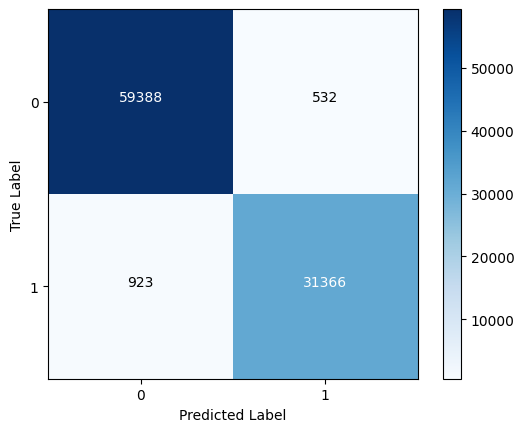

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59920
           1       0.98      0.97      0.98     32289

    accuracy                           0.98     92209
   macro avg       0.98      0.98      0.98     92209
weighted avg       0.98      0.98      0.98     92209

Sensitivity: [0.9911214953271028, 0.9714144135773793]
Specificity: [0.9714144135773793, 0.9911214953271028]


In [ ]:
evaluate_classifier(y_test, y_pred)